## Scikit Learn

An end to end scikit learn work flow
 
1. Getting data ready
2. Choose the right estimator/algorithm for our problem
3. Fit the model/algorithm and use it to make prediction of our data
4. Evaluate the model
5. Improve the model
6. Save and load a trained model
7. Putting it all together


In [3]:
import pandas as pd           

In [4]:
heart_disease = pd.read_csv("datas/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

In [6]:
X.shape, Y.shape

((303, 13), (303,))

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
clf = RandomForestClassifier()

In [9]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X.shape, Y.shape

((303, 13), (303,))

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [13]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [14]:
y_predicts = clf.predict(x_test)

In [15]:
y_predicts

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [16]:
clf.score(x_train, y_train)

1.0

In [17]:
clf.score(x_test, y_test)

0.8524590163934426

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_predicts))

print(confusion_matrix(y_test, y_predicts))

print(accuracy_score(y_test, y_predicts))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

[[24  5]
 [ 4 28]]
0.8524590163934426


In [19]:
import numpy as np

In [20]:
np.random.seed(42)

for i in range(10, 100, 10):
    print(f"{i} estimators")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"{clf.score(x_test, y_test) * 100}")

10 estimators
85.24590163934425
20 estimators
80.32786885245902
30 estimators
83.60655737704919
40 estimators
80.32786885245902
50 estimators
86.88524590163934
60 estimators
83.60655737704919
70 estimators
83.60655737704919
80 estimators
83.60655737704919
90 estimators
81.9672131147541


In [21]:
import pickle

In [22]:
pickle.dump(clf, open("pickles/random_forest_clf.pkl", "wb"))

In [23]:
loaded_model = pickle.load(open("pickles/random_forest_clf.pkl", "rb"))

In [24]:
loaded_model.score(x_test, y_test)

0.819672131147541

In [25]:
# Standard Imports 

import numpy as np
import pandas as pd

In [26]:
heart_disease.head

<bound method NDFrame.head of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1      

In [27]:
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [28]:
x.head

<bound method NDFrame.head of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0 

In [29]:
y.head

<bound method NDFrame.head of 0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64>

In [30]:
car_sales = pd.read_csv("datas/car-sales-missing-data.csv")

In [31]:
car_sales

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [32]:
len(car_sales)

10

In [33]:
car_sales.isna().sum()

Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

In [34]:
car_sales_extended = pd.read_csv("datas/car-sales-extended.csv")

In [35]:
car_sales_extended

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [36]:
car_sales_extended.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [37]:
x = car_sales_extended.drop("Price", axis=1)
y = car_sales_extended["Price"]

# split test & train

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [38]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(x_train, y_train)

ValueError: could not convert string to float: 'Honda'

In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [40]:
categorical_column = ["Make", "Colour", "Doors"]

In [41]:
one_hot = OneHotEncoder()

In [42]:
transformer = ColumnTransformer([("one_hot", one_hot, categorical_column)], remainder="passthrough")

In [43]:
transformed_x = transformer.fit_transform(x)

In [44]:
dummies = pd.get_dummies(car_sales[["Make", "Colour","Doors"]])

In [45]:
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4.0,False,False,False,True,False,False,False,False,True
1,4.0,False,True,False,False,False,False,False,True,False
2,3.0,False,False,False,True,False,True,False,False,False
3,5.0,True,False,False,False,True,False,False,False,False
4,4.0,False,False,True,False,False,False,False,False,True
5,4.0,False,False,False,True,False,False,True,False,False
6,4.0,False,True,False,False,False,False,False,False,False
7,4.0,False,True,False,False,False,True,False,False,False
8,NaN,False,False,False,True,False,False,False,False,True
9,4.0,False,False,False,False,False,False,False,False,True


In [46]:
np.random.seed(42)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

In [48]:
clf = RandomForestRegressor()

In [49]:
clf.fit(x_train, y_train)

RandomForestRegressor()

In [50]:
clf.score(x_test, y_test)

0.3235867221569877

In [51]:
# Fill missing datas with pandas

car_sales_missing = pd.read_csv("datas/car-sales-extended-missing-data.csv")

In [52]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [53]:
car_sales_missing["Make"].fillna("missing", inplace=True)
car_sales_missing["Colour"].fillna("missing", inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)
car_sales_missing["Doors"].fillna(4, inplace=True)

/tmp/ipykernel_227255/4135906857.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing["Make"].fillna("missing", inplace=True)
/tmp/ipykernel_227255/4135906857.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [54]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [55]:
car_sales_missing.dropna(inplace=True)

In [56]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [57]:
car_sales_missing = pd.read_csv("datas/car-sales-extended-missing-data.csv")

In [58]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [59]:
car_sales_missing.dropna(subset=["Price"], inplace=True)

In [60]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [61]:
# Filling  missing value with scikit learn

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
doors_imputer = SimpleImputer(strategy="constant", fill_value=4)
numeric_imputer = SimpleImputer(strategy="mean")

In [62]:
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
numeric_features = ["Odometer (KM)"]

In [63]:
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", doors_imputer, door_features),
    ("numeric_imputer", numeric_imputer, numeric_features)
])

fixed_x = imputer.fit_transform(x)

In [64]:
car_sales_filled = pd.DataFrame(fixed_x, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

In [65]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [66]:
# Getting California housing datasets

from sklearn.datasets import fetch_california_housing

housings = fetch_california_housing()

housings

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [67]:
housings['data']

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [68]:
housings['target']

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [69]:
housing_df = pd.DataFrame(housings['data'])

In [70]:
housing_df

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [71]:
housing_df = pd.DataFrame(housings['data'], columns=housings['feature_names'])

In [72]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [73]:
housing_df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [74]:
housing_df['MedHouseVal'] = housings['target']

In [75]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [76]:
x = housing_df.drop("MedHouseVal", axis=1)
y = housing_df['MedHouseVal']

In [77]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2)

In [78]:
from sklearn.linear_model import Ridge

In [79]:
model = Ridge()

model.fit(x_train, y_train)

Ridge()

In [80]:
model.score(x_test, y_test)

0.6036318845797283

In [81]:
# Ensumble model

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)


In [82]:
housing_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [83]:
x = housing_df.drop(["MedHouseVal"], axis=1)
y = housing_df["MedHouseVal"]

In [84]:
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.2)

In [85]:
model = RandomForestRegressor(n_estimators=100)

In [86]:
model .fit(x_train, y_train)

RandomForestRegressor()

In [87]:
model.score(x_test, y_test)

0.8066196804802649

In [88]:
# Picking ML Model for classification

haert_diseases = pd.read_csv("datas/heart-disease.csv")

In [89]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [90]:
# choosing the right estimator
# Try Linear SVC (Support Vector Classification)

from sklearn.svm import LinearSVC

np.random.seed(42)

x = heart_disease.drop(["target"], axis=1)
y = heart_disease['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2)

model = LinearSVC()

model.fit(x_train, y_train)


LinearSVC()

In [91]:
model.score(x_test, y_test)

0.7695473251028807

In [92]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(x_train, y_train)

RandomForestClassifier()

In [93]:
model.score(x_test, y_test)

0.8271604938271605

In [94]:
model.predict(x_test)

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1])

In [95]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1])

In [96]:
y_predicts = model.predict(x_test)

In [97]:
y_predicts

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1])

In [160]:
np.mean(y_predicts == np.array(y_test))

np.float64(0.8271604938271605)

In [161]:
from sklearn.metrics import accuracy_score

accuracy_score(y_predicts, y_test)

0.8271604938271605

In [165]:
# predict Proba

pred_prob = model.predict_proba(x_test)

In [169]:
pred_prob[:5]

array([[0.93, 0.07],
       [0.41, 0.59],
       [0.33, 0.67],
       [0.88, 0.12],
       [0.22, 0.78]])

In [171]:
y_predicts[:5]

array([0, 1, 1, 0, 1])

In [172]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [174]:
x = housing_df.drop(["MedHouseVal"], axis=1)
y = housing_df["MedHouseVal"]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(x_train, y_train)


RandomForestRegressor()

In [175]:
model.score(x_test, y_test)

0.7651889974237225

In [176]:
y_preds = model.predict(x_test)

In [179]:
y_preds[:5]

array([3.1515909, 2.6749902, 1.24131  , 1.39099  , 2.67565  ])

In [180]:
y_test[:5]

17927    2.513
4243     3.429
13126    1.701
6237     1.673
13032    1.792
Name: MedHouseVal, dtype: float64

In [181]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

np.float64(0.37573540519622106)

In [183]:
# Three ways to evaluate Scikit Learn Model/Estimators

# 1. Estimator's build in score() method'
# 2. The "Scoring" Parameters
# 3. Problem specific metrics functions

In [190]:
# Evaluate using Score() method

heart_disease = pd.read_csv("datas/heart-disease.csv")
heart_disease.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [192]:
x = heart_disease.drop(["target"], axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(x_train, y_train)

RandomForestClassifier()

In [193]:
model.score(x_test, y_test)

0.7540983606557377

In [194]:
x = housing_df.drop(["MedHouseVal"], axis=1)
y = housing_df["MedHouseVal"]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(x_train, y_train)


RandomForestRegressor()

In [195]:
model.score(x_test, y_test)

0.7698936261735461

In [196]:
from sklearn.model_selection import cross_val_score

In [197]:
x = heart_disease.drop(["target"], axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(x_train, y_train)

RandomForestClassifier()

In [198]:
model.score(x_test, y_test)

0.8360655737704918

In [199]:
cross_val_score(model, x, y, cv=5)

array([0.85245902, 0.85245902, 0.81967213, 0.8       , 0.75      ])

In [200]:
np.mean(cross_val_score(model, x, y, cv=5))

np.float64(0.8215300546448088)

In [201]:
# Classification Model Evaluation Matrix

# 1. Accuracy
# 2. Area under ROC Curve
# 3. Confusion Matrix
# 4. Classification Report

In [202]:
# ROC Curve

x = heart_disease.drop(["target"], axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(x_train, y_train)

RandomForestClassifier()

In [218]:
y_probs = model.predict_proba(x_test)
y_train_probs = model.predict_proba(x_train)

y_probs[:10]

array([[0.09, 0.91],
       [0.92, 0.08],
       [0.96, 0.04],
       [0.91, 0.09],
       [0.06, 0.94],
       [0.06, 0.94],
       [0.96, 0.04],
       [0.21, 0.79],
       [0.05, 0.95],
       [0.83, 0.17]])

In [219]:

y_train_probs[:10]

array([[0.09, 0.91],
       [0.92, 0.08],
       [0.96, 0.04],
       [0.91, 0.09],
       [0.06, 0.94],
       [0.06, 0.94],
       [0.96, 0.04],
       [0.21, 0.79],
       [0.05, 0.95],
       [0.83, 0.17]])

In [205]:
y_probs_positive = y_probs[:,1]

In [207]:
y_probs_positive[:10]

array([0.89, 0.49, 0.98, 0.1 , 0.76, 0.65, 0.98, 0.5 , 0.93, 0.88])

In [212]:
from sklearn.metrics import roc_curve
frp, trp, threshold = roc_curve(y_test, y_probs_positive)

In [210]:
frp[:10]

array([0.        , 0.        , 0.        , 0.        , 0.04545455,
       0.04545455, 0.04545455, 0.04545455, 0.04545455, 0.04545455])

In [224]:
import matplotlib.pyplot as plt

def plot_roc_curve(frp, trp):
    plt.plot(frp, trp, color="orange", label="ROC")
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Gussing")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

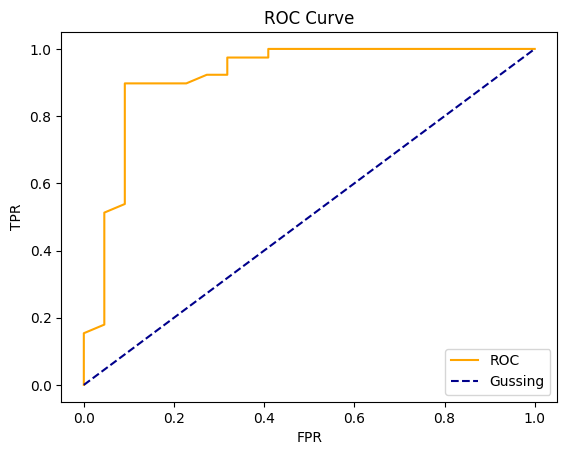

In [225]:
plot_roc_curve(frp, trp)

In [102]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

heart_disease = pd.read_csv("datas/heart-disease.csv")

x = heart_disease.drop(["target"], axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2)

model = RandomForestClassifier()

model.fit(x_train, y_train)

model.predict(x_test)

model.score(x_test, y_test)



0.831275720164609

In [107]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
260    0
199    0
14     1
47     1
94     1
Name: target, Length: 243, dtype: int64

In [110]:
y_preds = pd.DataFrame(y_preds)

In [111]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

y_preds = model.predict(x_test)

confusion_matrix(y_test, y_preds)



array([[ 80,  29],
       [ 12, 122]])

In [114]:
pd.crosstab(y_test, y_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,80,29
1,12,122


In [116]:
import seaborn as sns

sns.set(font_scale=1.5)

In [119]:
conf_mat = confusion_matrix(y_test, y_preds)

<Axes: >

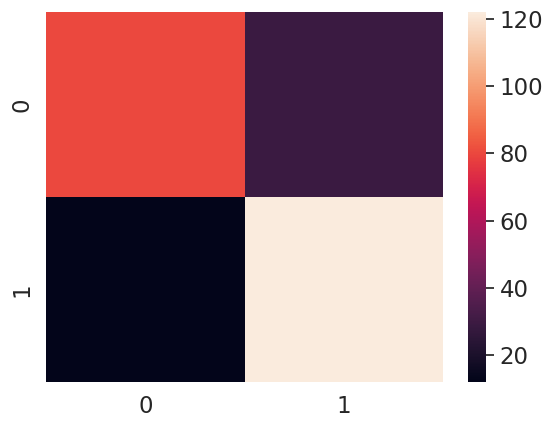

In [120]:
sns.heatmap(conf_mat)

In [122]:

import sklearn
print(sklearn.__version__)


1.5.2


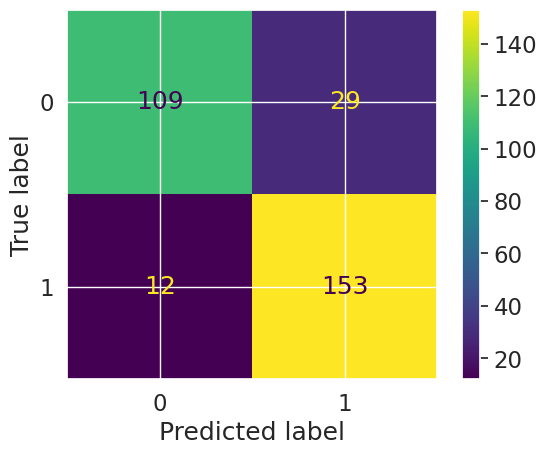

In [125]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=model, X=x, y=y)

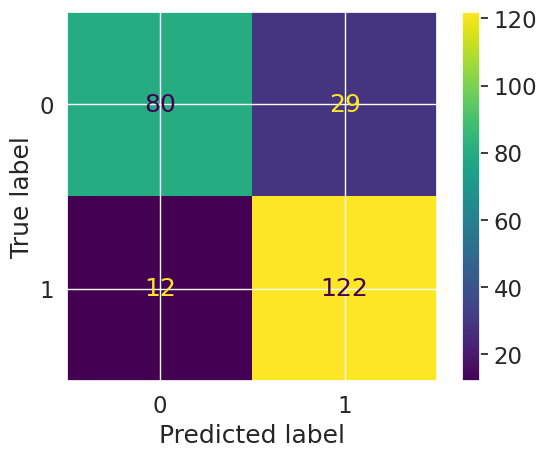

In [126]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

In [128]:
# Classification Report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.73      0.80       109
           1       0.81      0.91      0.86       134

    accuracy                           0.83       243
   macro avg       0.84      0.82      0.83       243
weighted avg       0.84      0.83      0.83       243



In [129]:
# Regression Model Evaluation Matrix

# 1. R^2
# 2. MAE Mean Absolute Error
# 3. MSE Mean Squared Error

In [130]:
x = housing_df.drop(["MedHouseVal"], axis=1)
y = housing_df["MedHouseVal"]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(x_train, y_train)

RandomForestRegressor()

In [132]:
# Regression Model Evaluatioon Matrix using R^2 

from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())

In [133]:
r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

In [136]:
# Mean Absolute Error (MAE)

from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)

mae = mean_absolute_error(y_test, y_preds)

In [137]:
mae

np.float64(0.37701909782582377)

In [138]:
df = pd.DataFrame(data = {"actual values" : y_test, "predicted values" : y_preds})

In [139]:
df

,actual values,predicted values
13976,1.339,1.831030
14980,1.291,1.247910
6097,1.996,2.401020
7808,1.856,1.926570
5995,1.121,1.184190
...,...,...
14407,3.853,4.216803
4686,2.875,3.373831
4922,0.904,1.100580
15833,3.750,4.418785


In [140]:
df['difference'] = df['actual values'] - df["predicted values"]

In [143]:
np.abs(df["difference"]).mean()

np.float64(0.37701909782582377)

In [144]:
# Improve  a Model

# Two ways 

# 1. From Data Perspective
# 2. From Model Perspective

# Hyperparameters vs Parameters

# Three ways to adjust hyperparameters 

# 1. By Hands
# 2. Randomly with RandomSearchSv
# 3. Exhastly with GridSearchCV

